In [17]:
#!pip install opencv-python

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
face_cascade = cv2.CascadeClassifier('./data/haarcascades/haarcascade_frontalface_default.xml')

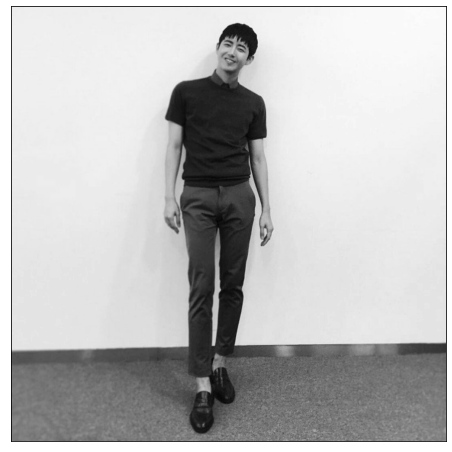

In [37]:
image = cv2.imread('./data/test3.jpg')
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12,8))
plt.imshow(grayImage, cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [38]:
faces = face_cascade.detectMultiScale(grayImage, 1.03, 5)

print(faces.shape)
print("Number of faces detected: " + str(faces.shape[0]))

(1, 4)
Number of faces detected: 1


In [39]:
faces

array([[374,  45,  73,  73]], dtype=int32)

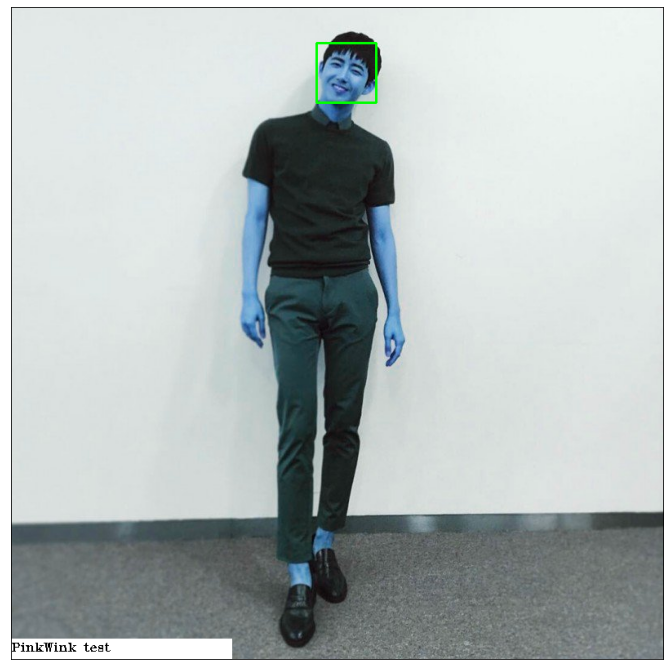

In [40]:
# 얼굴 찾기
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

cv2.rectangle(image, ((0,image.shape[0] -25)), 
              (270, image.shape[0]), (255,255,255), -1);
cv2.putText(image, "PinkWink test", (0,image.shape[0] -10), 
            cv2.FONT_HERSHEY_TRIPLEX, 0.5,  (0,0,0), 1);

plt.figure(figsize=(12,12))
plt.imshow(image, cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

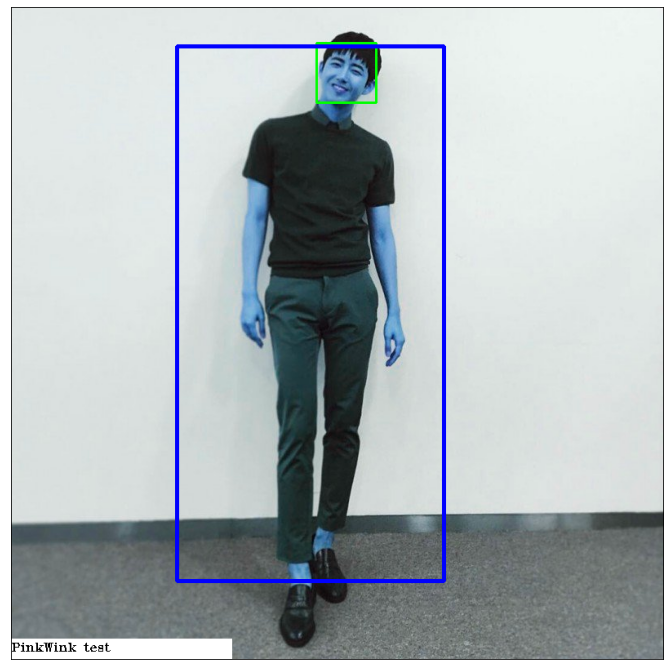

In [41]:
# 얼굴 찾은 사진에 몸도 찾아서 추가
body_cascade = cv2.CascadeClassifier('./data/haarcascades/haarcascade_fullbody.xml')
body = body_cascade.detectMultiScale(grayImage, 1.01, 10)

for (x,y,w,h) in body:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3)

plt.figure(figsize=(12,12))
plt.imshow(image, cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

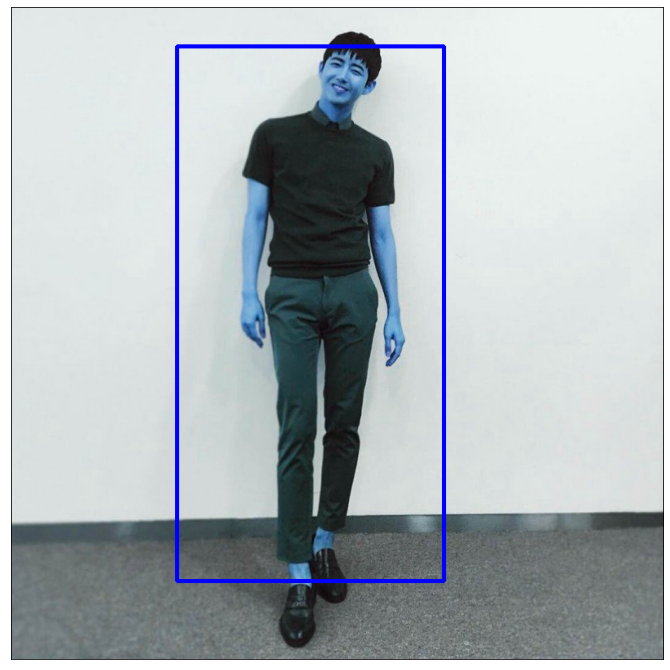

In [42]:
# 찾은 몸 안에 얼굴 찾기 (얼굴 왜 못찾아?!!)
image = cv2.imread('./data/test3.jpg')
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

body_cascade = cv2.CascadeClassifier('./data/haarcascades/haarcascade_fullbody.xml')
body = body_cascade.detectMultiScale(grayImage, 1.01, 10)

for (x,y,w,h) in body:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3)
    
    body_image_gray = grayImage[y:y+h, x:x+w]
    body_image_color = image[y:y+h, x:x+w]
    
    faces_in_body = face_cascade.detectMultiScale(body_image_gray)

    for (xf,yf,wf,hf) in faces_in_body:
        cv2.rectangle(body_image_color,(xf,yf),(xf+wf,yf+hf),(0,255,0),2)
        
        
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()